<a href="https://colab.research.google.com/github/nin844/it_practice/blob/main/pandas03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
import openpyxl
import pandas as pd
import glob

In [ ]:
import_file_path = '/content/drive/My Drive/sample.xlsx'
excel_sheet_name = '発注管理表'   # 編集するシート
export_file_path = '/content/drive/My Drive/output'

In [ ]:
'/content/drive/My Drive/sample.xlsx'

'/content/drive/My Drive/sample.xlsx'

In [ ]:
df_order = pd.read_excel(import_file_path, sheet_name=excel_sheet_name)
df_order

,会社名,商品番号,商品分類,商品名,単価（円）,数量,発注金額
0,株式会社A,b023,ボトムス,ロングパンツ,7000,8,56000
1,株式会社A,b003,ボトムス,ジーンズ,6000,10,60000
2,株式会社A,b003,ボトムス,ロングパンツ,7000,10,70000
3,株式会社A,b036,ボトムス,ロングパンツ,7000,2,14000
4,株式会社A,b013,トップス,ニット,8000,7,56000
...,...,...,...,...,...,...,...
195,株式会社Y,b013,ボトムス,ハーフパンツ,3000,1,3000
196,株式会社Y,b036,アウター,ダウン,18000,3,54000
197,株式会社Z,b003,アウター,ダウン,18000,4,72000
198,株式会社Z,b047,ボトムス,ハーフパンツ,3000,3,9000


In [ ]:
company_name = df_order['会社名'].unique() #会社名をユニークにして取得

In [ ]:
company_name

array(['株式会社A', '株式会社B', '株式会社C', '株式会社D', '株式会社E', '株式会社F', '株式会社G',
       '株式会社H', '株式会社I', '株式会社J', '株式会社K', '株式会社L', '株式会社M', '株式会社N',
       '株式会社O', '株式会社P', '株式会社Q', '株式会社R', '株式会社S', '株式会社T', '株式会社U',
       '株式会社V', '株式会社W', '株式会社X', '株式会社Y', '株式会社Z'], dtype=object)

In [ ]:
type(company_name)

numpy.ndarray

In [ ]:
type(df_order)

pandas.core.frame.DataFrame

In [ ]:
df_order['会社名'] == '株式会社A'

0       True
1       True
2       True
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: 会社名, Length: 200, dtype: bool

In [ ]:
df_order[df_order['会社名']=='株式会社A']

,会社名,商品番号,商品分類,商品名,単価（円）,数量,発注金額
0,株式会社A,b023,ボトムス,ロングパンツ,7000,8,56000
1,株式会社A,b003,ボトムス,ジーンズ,6000,10,60000
2,株式会社A,b003,ボトムス,ロングパンツ,7000,10,70000
3,株式会社A,b036,ボトムス,ロングパンツ,7000,2,14000
4,株式会社A,b013,トップス,ニット,8000,7,56000
5,株式会社A,b047,アウター,ダウン,18000,7,126000
6,株式会社A,b013,トップス,ニット,8000,5,40000
7,株式会社A,b013,ボトムス,ハーフパンツ,3000,9,27000
8,株式会社A,b047,ボトムス,ロングパンツ,7000,1,7000
9,株式会社A,b036,ボトムス,ハーフパンツ,3000,5,15000


In [ ]:
# フィルタリングして別ファイルに保存する
for i in company_name:
  print(i)

株式会社A
株式会社B
株式会社C
株式会社D
株式会社E
株式会社F
株式会社G
株式会社H
株式会社I
株式会社J
株式会社K
株式会社L
株式会社M
株式会社N
株式会社O
株式会社P
株式会社Q
株式会社R
株式会社S
株式会社T
株式会社U
株式会社V
株式会社W
株式会社X
株式会社Y
株式会社Z


In [ ]:
for i in company_name:
  df_order_company = df_order[df_order['会社名']== i]
  print(df_order_company)

      会社名  商品番号  商品分類     商品名  単価（円）  数量    発注金額
0   株式会社A  b023  ボトムス  ロングパンツ   7000   8   56000
1   株式会社A  b003  ボトムス    ジーンズ   6000  10   60000
2   株式会社A  b003  ボトムス  ロングパンツ   7000  10   70000
3   株式会社A  b036  ボトムス  ロングパンツ   7000   2   14000
4   株式会社A  b013  トップス     ニット   8000   7   56000
5   株式会社A  b047  アウター     ダウン  18000   7  126000
6   株式会社A  b013  トップス     ニット   8000   5   40000
7   株式会社A  b013  ボトムス  ハーフパンツ   3000   9   27000
8   株式会社A  b047  ボトムス  ロングパンツ   7000   1    7000
9   株式会社A  b036  ボトムス  ハーフパンツ   3000   5   15000
10  株式会社A  b003  トップス     シャツ   4000   1    4000
11  株式会社A  b003  アウター     ダウン  18000   1   18000
      会社名  商品番号  商品分類     商品名  単価（円）  数量   発注金額
12  株式会社B  b036  アウター     ダウン  18000   3  54000
13  株式会社B  b047  トップス     シャツ   4000   1   4000
14  株式会社B  b003  ボトムス  ロングパンツ   7000   6  42000
15  株式会社B  b036  トップス     シャツ   4000   5  20000
16  株式会社B  b003  トップス     シャツ   4000   6  24000
17  株式会社B  b013  ボトムス  ロングパンツ   7000   5  35000
18  株式会社B  b003  ボトムス  ロングパ

In [ ]:
for i in company_name:
    df_order_company = df_order[df_order['会社名']==i]
    df_goods = df_order_company.groupby('商品番号').sum()
    df_goods.to_excel(export_file_path + '/' +i+ '.xlsx')
    #df_test = pd.DataFrame(df_goods.sum(axis='columns'),columns=['発注金額'])
    #print(df_test)
    #df_goods  = pd.concat([df_goods, pd.DataFrame(df_goods.sum(axis=1),columns=['発注金額'])],axis=1)
    #print(df_goods)

 
    #account = df_goods['発注金額'].sum()
    #df_account = pd.DataFrame([["","","","","","",account]], columns=["会社名","商品番号","商品分類","商品名","単価（円）","数量", "発注金額"])
    #df_goods = df_goods.append(df_account, ignore_index = True)
    # print(df_goods)
   
#  df_goods_no = df_order_company['商品番号'].unique()
#  df.groupby('category').sum()
#  df_concat=pd.DataFrame()
#  for j in df_goods_no:
#    df_order_goods = df_order_company[df_order_company['商品番号']==j]
#    df_concat = pd.concat([df_concat, df_order_goods])
#  df_concat= df_concat[['単価（円）','数量'].sum()]

#  print(i)
#  print(df_goods)  

  

In [ ]:
#1つのファイルに複数のファイルをまとめる

In [ ]:
export_file_path='/content/drive/My Drive/MyPandas'

In [ ]:
import_folder_path = '/content/drive/My Drive/MyPandas/rawdate'

In [ ]:
path = import_folder_path + '/' + '*.xlsx'

In [ ]:
# フォルダの中にあるファイルをリストにする
file_path = glob.glob(path)
file_path

['/content/drive/My Drive/MyPandas/rawdate/札幌支店.xlsx',
 '/content/drive/My Drive/MyPandas/rawdate/東京支店.xlsx',
 '/content/drive/My Drive/MyPandas/rawdate/福岡支店.xlsx',
 '/content/drive/My Drive/MyPandas/rawdate/横浜支店.xlsx',
 '/content/drive/My Drive/MyPandas/rawdate/大阪支店.xlsx']

In [ ]:
# 上のリストのファイルを全て結合する
df_concat = pd.DataFrame()

for i in file_path:
  df_read_excel = pd.read_excel(i)
  print(df_read_excel.head(3))

   社員番号     氏名  支店   売上目標   売上実績    達成率
0  a005  寺下 春樹  札幌  38000  39271  1.033
1  a007  関藤 梨花  札幌  25000  30405  1.216
2  a022  安楽 遼子  札幌  30000  29785  0.993
   社員番号      氏名  支店   売上目標   売上実績    達成率
0  a001   辻上 明佳  東京  40000  39856  0.996
1  a003  石崎 和香菜  東京  39000  42011  1.077
2  a012  辻下 万美子  東京  39000  36501  0.936
   社員番号     氏名  支店   売上目標   売上実績    達成率
0  a006  八尾 洋志  福岡  28000  23405  0.836
1  a010  鍵谷 一磨  福岡  27000  30102  1.115
2  a013  宮瀬 尚紀  福岡  26000  30123  1.159
   社員番号     氏名  支店   売上目標   売上実績    達成率
0  a002  押元 大成  横浜  48000  45678  0.952
1  a008  水戸 美砂  横浜  41000  43201  1.054
2  a009  小花 賢悟  横浜  45000  46789  1.040
   社員番号     氏名  支店   売上目標   売上実績    達成率
0  a004  斉 あきの  大阪  43000  39780  0.925
1  a011  山藤 善雄  大阪  40000  35401  0.885
2  a014  植野 寛美  大阪  25000  20493  0.820


In [ ]:
# ファイルを縦に結合する
df_concat = pd.DataFrame()

for i in file_path:
  df_read_excel = pd.read_excel(i)
  df_concat = pd.concat([df_read_excel,df_concat])

In [ ]:
df_concat

,社員番号,氏名,支店,売上目標,売上実績,達成率
0,a004,斉 あきの,大阪,43000,39780,0.925
1,a011,山藤 善雄,大阪,40000,35401,0.885
2,a014,植野 寛美,大阪,25000,20493,0.820
3,a017,周藤 愛乃,大阪,38000,45929,1.209
4,a018,尾下 勝広,大阪,33000,33002,1.000
5,a019,河路 文武,大阪,33000,34001,1.030
6,a023,河野 利香,大阪,40000,41239,1.031
7,a029,矢野川 昌寛,大阪,42000,34501,0.821
8,a031,八木沢 和貴,大阪,40000,42500,1.063
9,a034,堂園 泰典,大阪,31000,26834,0.866


In [ ]:
# 列名を1列消去する
# df_drop = df_concat.drop('列名',axis =1)

In [ ]:
df_drop =df_concat
df_drop.head(3)

,社員番号,氏名,支店,売上目標,売上実績,達成率
0,a004,斉 あきの,大阪,43000,39780,0.925
1,a011,山藤 善雄,大阪,40000,35401,0.885
2,a014,植野 寛美,大阪,25000,20493,0.820


In [ ]:
# 達成率の降順にソートする
df_sort = df_drop.sort_values(by='達成率', ascending=False)
df_sort

,社員番号,氏名,支店,売上目標,売上実績,達成率
3,a016,芳澤 佳乃子,横浜,30000,37869,1.262
1,a007,関藤 梨花,札幌,25000,30405,1.216
3,a017,周藤 愛乃,大阪,38000,45929,1.209
8,a037,片尾 愛佑美,東京,41000,49219,1.200
2,a013,宮瀬 尚紀,福岡,26000,30123,1.159
3,a015,新森 雅紀,福岡,30000,34569,1.152
6,a027,本永 悠希,東京,25000,27893,1.116
1,a010,鍵谷 一磨,福岡,27000,30102,1.115
5,a026,三角 静江,東京,35000,38801,1.109
8,a036,西尾 謙,横浜,25000,27349,1.094


In [ ]:
# ファイル書き込み
df_sort.to_excel(export_file_path + '/' + '予実管理表.xlsx')

In [ ]:
# openpyxl でワークブックを読み込む　不要なカラムをデリートして書き込む
workbook = openpyxl.load_workbook(export_file_path + '/' + '予実管理表.xlsx')
worksheet = workbook.worksheets[0]
worksheet.delete_cols(1)
workbook.save(export_file_path + '/' + '予実管理表01.xlsx')

In [ ]:
import_file = '/content/drive/My Drive/sample_a.xlsx'

In [ ]:
excel_sheetname01 = '社員マスタ'
excel_sheetname02 = '予算管理表'
excel_sheetname03 = '実績管理表'
excel_sheetname04 = '実績管理表社員ID未記入'

In [ ]:
# excelデータ読込
df_employee_master = pd.read_excel(import_file, sheet_name = excel_sheetname01) 

In [ ]:
# 上位5件を表示
df_employee_master.head()

,社員番号,氏名,所属支店,性別,Unnamed: 4
0,a001,辻上 明佳,東京,女,40000.0
1,a002,押元 大成,横浜,男,48000.0
2,a003,石崎 和香菜,東京,女,39000.0
3,a004,斉 あきの,大阪,女,43000.0
4,a005,寺下 春樹,札幌,男,38000.0


In [ ]:
df_employee_budget = pd.read_excel(import_file, sheet_name = excel_sheetname02)

In [ ]:
df_employee_budget.head()

,社員番号,売上予算
0,a001,40000
1,a002,48000
2,a003,39000
3,a004,43000
4,a005,38000


In [ ]:
df_employee_actual = pd.read_excel(import_file, sheet_name = excel_sheetname03)
df_employee_actual.head()

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）
0,2020-01-04,a023,河野 利香,女,ボトムス,ロングパンツ,7000,8,56000
1,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000
2,2020-01-05,a052,井上 真,女,アウター,ジャケット,10000,7,70000
3,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000
4,2020-01-07,a036,西尾 謙,男,ボトムス,ロングパンツ,7000,2,14000


In [ ]:
# 社員番号をキーにマージ
pd.merge(df_employee_master, df_employee_budget, on='社員番号').head()

,社員番号,氏名,所属支店,性別,Unnamed: 4,売上予算
0,a001,辻上 明佳,東京,女,40000.0,40000
1,a002,押元 大成,横浜,男,48000.0,48000
2,a003,石崎 和香菜,東京,女,39000.0,39000
3,a004,斉 あきの,大阪,女,43000.0,43000
4,a005,寺下 春樹,札幌,男,38000.0,38000


In [ ]:
# 社員番号は一意なのでキーは省略可能
pd.merge(df_employee_master, df_employee_budget).head()

,社員番号,氏名,所属支店,性別,Unnamed: 4,売上予算
0,a001,辻上 明佳,東京,女,40000.0,40000
1,a002,押元 大成,横浜,男,48000.0,48000
2,a003,石崎 和香菜,東京,女,39000.0,39000
3,a004,斉 あきの,大阪,女,43000.0,43000
4,a005,寺下 春樹,札幌,男,38000.0,38000


In [ ]:
# キーになるカラム名が異なる場合
df_kekka = pd.merge(df_employee_master, df_employee_actual, left_on='社員番号', right_on ='社員ID').head()
df_kekka

,社員番号,氏名_x,所属支店,性別_x,Unnamed: 4,売上日,社員ID,氏名_y,性別_y,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,39000.0,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,39000.0,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,39000.0,2020-01-19,a003,石崎 和香菜,女,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,39000.0,2020-01-21,a003,石崎 和香菜,女,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,39000.0,2020-01-24,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,6,42000


In [ ]:
df_kekka.drop(['Unnamed: 4','氏名_y', '性別_y'], axis=1)

,社員番号,氏名_x,所属支店,性別_x,売上日,社員ID,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,2020-01-05,a003,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,2020-01-06,a003,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,2020-01-19,a003,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,2020-01-21,a003,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,2020-01-24,a003,ボトムス,ロングパンツ,7000,6,42000


In [ ]:
# 2つのキーで結合させる
pd.merge(df_employee_master, df_employee_actual, left_on=['氏名', '性別'], right_on=['氏名','性別']).head()

,社員番号,氏名,所属支店,性別,Unnamed: 4,売上日,社員ID,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,39000.0,2020-01-05,a003,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,39000.0,2020-01-06,a003,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,39000.0,2020-01-19,a003,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,39000.0,2020-01-21,a003,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,39000.0,2020-01-24,a003,ボトムス,ロングパンツ,7000,6,42000


In [ ]:
df_actual = pd.merge(df_employee_master, df_employee_actual, left_on = '社員番号', right_on ='社員ID')
df_actual

,社員番号,氏名_x,所属支店,性別_x,Unnamed: 4,売上日,社員ID,氏名_y,性別_y,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,39000.0,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,39000.0,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,39000.0,2020-01-19,a003,石崎 和香菜,女,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,39000.0,2020-01-21,a003,石崎 和香菜,女,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,39000.0,2020-01-24,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,6,42000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,NaN,2020-08-25,a052,井上 真,女,トップス,シャツ,4000,5,20000
220,a052,井上 真,東京,女,NaN,2020-09-01,a052,井上 真,女,ボトムス,ロングパンツ,7000,5,35000
221,a052,井上 真,東京,女,NaN,2020-09-11,a052,井上 真,女,トップス,シャツ,4000,2,8000
222,a052,井上 真,東京,女,NaN,2020-11-10,a052,井上 真,女,トップス,シャツ,4000,2,8000


In [ ]:
# 重複している列を削除する
df_actual = df_actual.drop(['Unnamed: 4', '氏名_y', '性別_y', '社員ID'], axis=1)

In [ ]:
# 列名を変更する(辞書型で変更前、変更後  インデックス部はcolumns → index にすればよい)
df_actual = df_actual.rename(columns={'氏名_x': '氏名' , '性別_x':'性別' })
df_actual

,社員番号,氏名,所属支店,性別,売上日,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,2020-01-05,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,2020-01-06,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,2020-01-19,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,2020-01-21,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,2020-01-24,ボトムス,ロングパンツ,7000,6,42000
...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,トップス,シャツ,4000,5,20000
220,a052,井上 真,東京,女,2020-09-01,ボトムス,ロングパンツ,7000,5,35000
221,a052,井上 真,東京,女,2020-09-11,トップス,シャツ,4000,2,8000
222,a052,井上 真,東京,女,2020-11-10,トップス,シャツ,4000,2,8000


In [ ]:
# ピボットテーブルで合計
df_actual.pivot_table( index='所属支店', columns='商品分類', values='売上金額（円）', aggfunc='sum' )

商品分類,アウター,トップス,ボトムス
所属支店,,,
大阪,918000,424000,458000
札幌,636000,296000,416000
東京,1582000,764000,1059000
横浜,786000,292000,361000
福岡,464000,340000,883000


In [ ]:
# ピボットテーブルで平均(整数で)
df_actual.pivot_table( index='氏名', columns='商品分類', values='売上金額（円）', aggfunc='mean').astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,106000,42285,29714
井上 真,70000,25000,22000
宮瀬 尚紀,77333,42500,35320
河野 利香,76500,35333,26941
石崎 和香菜,63875,37600,31535
西尾 謙,78600,26545,27769


In [ ]:
df_actual.pivot_table( index='所属支店', columns='商品分類', values='売上金額（円）', aggfunc='count' )

商品分類,アウター,トップス,ボトムス
所属支店,,,
大阪,12,12,17
札幌,6,7,14
東京,24,23,36
横浜,10,11,13
福岡,6,8,25


In [ ]:
# 標準偏差を求める
import numpy as np

In [ ]:
df_actual.pivot_table( index='所属支店', columns='商品分類', values='売上金額（円）', aggfunc=np.std).astype('int')

商品分類,アウター,トップス,ボトムス
所属支店,,,
大阪,51797,28582,17763
札幌,31215,28081,17273
東京,40412,22088,18438
横浜,57046,13537,21656
福岡,46573,20832,19241


In [ ]:
# 中央値
df_actual.pivot_table( index='所属支店', columns='商品分類', values='売上金額（円）', aggfunc=np.median ).astype('int')

商品分類,アウター,トップス,ボトムス
所属支店,,,
大阪,70000,32000,24000
札幌,108000,40000,27500
東京,65000,28000,27500
横浜,62000,24000,18000
福岡,71000,40000,36000


In [ ]:
# 二つの統計値を表示
df_actual.pivot_table( index='氏名', columns='商品分類', values='売上金額（円）', aggfunc=[np.mean, np.median]).astype('int')

mean                median              
商品分類      アウター   トップス   ボトムス    アウター   トップス   ボトムス
氏名                                                
上瀬 由和   106000  42285  29714  108000  40000  27500
井上 真     70000  25000  22000   65000  22000  21500
宮瀬 尚紀    77333  42500  35320   71000  40000  36000
河野 利香    76500  35333  26941   70000  32000  24000
石崎 和香菜   63875  37600  31535   65000  40000  27500
西尾 謙     78600  26545  27769   62000  24000  18000

In [ ]:
# 自分で作った式でも良い
df_actual.pivot_table(index='氏名', columns='商品分類', values='売上金額（円）', aggfunc=lambda x: np.sum(x)*1.10).astype('int')

商品分類,アウター,トップス,ボトムス
氏名,,,
上瀬 由和,699600,325600,457600
井上 真,616000,220000,193600
宮瀬 尚紀,510400,374000,971300
河野 利香,1009800,466400,503800
石崎 和香菜,1124200,620400,971300
西尾 謙,864600,321200,397100


In [ ]:
# sumifs の代わり 実績管理表
df_actual

,社員番号,氏名,所属支店,性別,売上日,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,2020-01-05,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,2020-01-06,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,2020-01-19,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,2020-01-21,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,2020-01-24,ボトムス,ロングパンツ,7000,6,42000
...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,トップス,シャツ,4000,5,20000
220,a052,井上 真,東京,女,2020-09-01,ボトムス,ロングパンツ,7000,5,35000
221,a052,井上 真,東京,女,2020-09-11,トップス,シャツ,4000,2,8000
222,a052,井上 真,東京,女,2020-11-10,トップス,シャツ,4000,2,8000


In [ ]:
df_employee_actual

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）
0,2020-01-04,a023,河野 利香,女,ボトムス,ロングパンツ,7000,8,56000
1,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000
2,2020-01-05,a052,井上 真,女,アウター,ジャケット,10000,7,70000
3,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000
4,2020-01-07,a036,西尾 謙,男,ボトムス,ロングパンツ,7000,2,14000
...,...,...,...,...,...,...,...,...,...
219,2020-12-26,a052,井上 真,女,アウター,ダウン,18000,4,72000
220,2020-12-28,a036,西尾 謙,男,アウター,ダウン,18000,3,54000
221,2020-12-30,a003,石崎 和香菜,女,アウター,ダウン,18000,4,72000
222,2020-12-30,a047,上瀬 由和,男,ボトムス,ハーフパンツ,3000,3,9000


In [ ]:
df_actual = df_employee_actual

In [ ]:
df_actual

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）
0,2020-01-04,a023,河野 利香,女,ボトムス,ロングパンツ,7000,8,56000
1,2020-01-05,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,10,60000
2,2020-01-05,a052,井上 真,女,アウター,ジャケット,10000,7,70000
3,2020-01-06,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,10,70000
4,2020-01-07,a036,西尾 謙,男,ボトムス,ロングパンツ,7000,2,14000
...,...,...,...,...,...,...,...,...,...
219,2020-12-26,a052,井上 真,女,アウター,ダウン,18000,4,72000
220,2020-12-28,a036,西尾 謙,男,アウター,ダウン,18000,3,54000
221,2020-12-30,a003,石崎 和香菜,女,アウター,ダウン,18000,4,72000
222,2020-12-30,a047,上瀬 由和,男,ボトムス,ハーフパンツ,3000,3,9000


In [ ]:
# 氏名と売上金額だけのデータフレームを作る
df_actual[['氏名', '売上金額（円）']]

,氏名,売上金額（円）
0,河野 利香,56000
1,石崎 和香菜,60000
2,井上 真,70000
3,石崎 和香菜,70000
4,西尾 謙,14000
...,...,...
219,井上 真,72000
220,西尾 謙,54000
221,石崎 和香菜,72000
222,上瀬 由和,9000


In [ ]:
# 氏名でグループ化
df_actual[['氏名', '売上金額（円）']].groupby('氏名').sum()

,売上金額（円）
氏名,
上瀬 由和,1348000
井上 真,936000
宮瀬 尚紀,1687000
河野 利香,1800000
石崎 和香菜,2469000
西尾 謙,1439000


In [ ]:
# 4月1日よりあと
df_actual['売上日']<="2020-04-01"

0       True
1       True
2       True
3       True
4       True
       ...  
219    False
220    False
221    False
222    False
223    False
Name: 売上日, Length: 224, dtype: bool

In [ ]:
# 7月1日よりも前
df_actual['売上日']<"2020-07-01"

50    True
51    True
52    True
53    True
54    True
55    True
56    True
57    True
58    True
59    True
60    True
61    True
62    True
63    True
64    True
65    True
66    True
67    True
68    True
69    True
70    True
71    True
72    True
73    True
74    True
75    True
76    True
77    True
78    True
79    True
80    True
81    True
82    True
83    True
84    True
85    True
86    True
87    True
88    True
89    True
90    True
91    True
92    True
93    True
94    True
95    True
96    True
97    True
Name: 売上日, dtype: bool

In [ ]:
df_actual = df_actual[(df_actual['売上日']>="2020-04-01") & (df_actual['売上日']<"2020-07-01")]
df_actual

,売上日,社員ID,氏名,性別,商品分類,商品名,単価（円）,数量,売上金額（円）
50,2020-04-03,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,3,21000
51,2020-04-04,a047,上瀬 由和,男,トップス,ニット,8000,8,64000
52,2020-04-09,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,8,56000
53,2020-04-09,a023,河野 利香,女,トップス,ニット,8000,10,80000
54,2020-04-11,a003,石崎 和香菜,女,ボトムス,ロングパンツ,7000,3,21000
55,2020-04-14,a003,石崎 和香菜,女,ボトムス,ジーンズ,6000,4,24000
56,2020-04-15,a036,西尾 謙,男,アウター,ジャケット,10000,3,30000
57,2020-04-18,a003,石崎 和香菜,女,トップス,ニット,8000,1,8000
58,2020-04-18,a051,井上 真,男,ボトムス,ロングパンツ,7000,5,35000
59,2020-04-19,a003,石崎 和香菜,女,トップス,ニット,8000,6,48000


In [ ]:
df_actual[['氏名','売上金額（円）']].groupby('氏名').sum()

,売上金額（円）
氏名,
上瀬 由和,224000
井上 真,167000
宮瀬 尚紀,208000
河野 利香,558000
石崎 和香菜,576000
西尾 謙,291000


In [ ]:
# 商品分類ごとも追加
df_actual[['氏名','商品分類','売上金額（円）']].groupby(['氏名', '商品分類']).sum()

売上金額（円）
氏名     商品分類         
上瀬 由和  アウター    60000
       トップス   104000
       ボトムス    60000
井上 真   トップス    84000
       ボトムス    83000
宮瀬 尚紀  アウター    70000
       ボトムス   138000
河野 利香  アウター   254000
       トップス   244000
       ボトムス    60000
石崎 和香菜 アウター    60000
       トップス   252000
       ボトムス   264000
西尾 謙   アウター   130000
       トップス    80000
       ボトムス    81000

In [ ]:
!pip install sns

  Created wheel for sns: filename=sns-0.1-cp36-none-any.whl size=2664 sha256=a47e04c394ee192c0210fed5e6a4d5ae08ab27d6a579094debef03f70a2b7239
  Stored in directory: /root/.cache/pip/wheels/be/a5/d8/4390400ed430c8186a6af96dbb1cc7d0a00a5dee15d268b627
Successfully built sns


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# 氏名・商品分類の合計のピボットテーブル
df_actual = pd.merge(df_employee_master, df_employee_actual, left_on='社員番号', right_on ='社員ID')

In [ ]:
df_actual = df_actual.drop(['Unnamed: 4', '氏名_y', '性別_y'], axis =1)
df_actual

,社員番号,氏名_x,所属支店,性別_x,売上日,社員ID,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,2020-01-05,a003,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,2020-01-06,a003,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,2020-01-19,a003,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,2020-01-21,a003,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,2020-01-24,a003,ボトムス,ロングパンツ,7000,6,42000
...,...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,a052,トップス,シャツ,4000,5,20000
220,a052,井上 真,東京,女,2020-09-01,a052,ボトムス,ロングパンツ,7000,5,35000
221,a052,井上 真,東京,女,2020-09-11,a052,トップス,シャツ,4000,2,8000
222,a052,井上 真,東京,女,2020-11-10,a052,トップス,シャツ,4000,2,8000


In [ ]:
df_actual = df_actual.rename(columns={'氏名_x':'氏名', '性別_x':'性別'})

In [ ]:
df_actual

,社員番号,氏名,所属支店,性別,売上日,社員ID,商品分類,商品名,単価（円）,数量,売上金額（円）
0,a003,石崎 和香菜,東京,女,2020-01-05,a003,ボトムス,ジーンズ,6000,10,60000
1,a003,石崎 和香菜,東京,女,2020-01-06,a003,ボトムス,ロングパンツ,7000,10,70000
2,a003,石崎 和香菜,東京,女,2020-01-19,a003,トップス,シャツ,4000,1,4000
3,a003,石崎 和香菜,東京,女,2020-01-21,a003,アウター,ダウン,18000,1,18000
4,a003,石崎 和香菜,東京,女,2020-01-24,a003,ボトムス,ロングパンツ,7000,6,42000
...,...,...,...,...,...,...,...,...,...,...,...
219,a052,井上 真,東京,女,2020-08-25,a052,トップス,シャツ,4000,5,20000
220,a052,井上 真,東京,女,2020-09-01,a052,ボトムス,ロングパンツ,7000,5,35000
221,a052,井上 真,東京,女,2020-09-11,a052,トップス,シャツ,4000,2,8000
222,a052,井上 真,東京,女,2020-11-10,a052,トップス,シャツ,4000,2,8000


In [ ]:
# 氏名・商品分類の合計のピボットテーブル
df_sales_pivot  = df_actual.pivot_table(index='所属支店', columns='商品分類', values='売上金額（円）', aggfunc='sum')
df_sales_pivot.head()

商品分類,アウター,トップス,ボトムス
所属支店,,,
大阪,918000,424000,458000
札幌,636000,296000,416000
東京,1582000,764000,1059000
横浜,786000,292000,361000
福岡,464000,340000,883000


In [ ]:
df_sales_pivot.index=['osaka', 'sapporo','tokyo','yokohama','fukuoka']
df_sales_pivot.columns=['outer','tops','bottoms']

In [ ]:
df_sales_pivot

,outer,tops,bottoms
osaka,918000,424000,458000
sapporo,636000,296000,416000
tokyo,1582000,764000,1059000
yokohama,786000,292000,361000
fukuoka,464000,340000,883000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


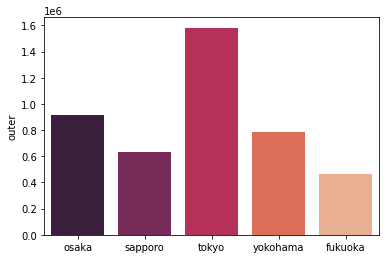

In [ ]:
sns.barplot(df_sales_pivot.index, df_sales_pivot['outer'], palette='rocket')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


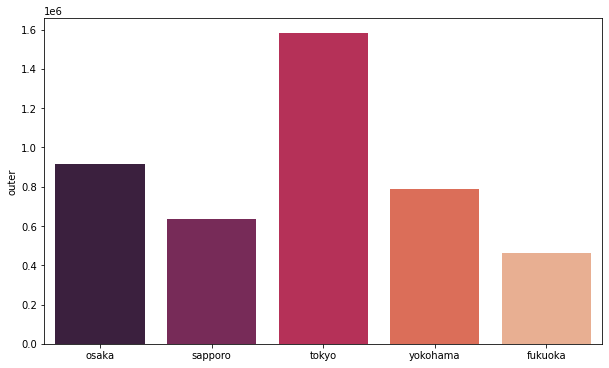

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(df_sales_pivot.index, df_sales_pivot['outer'], palette='rocket')

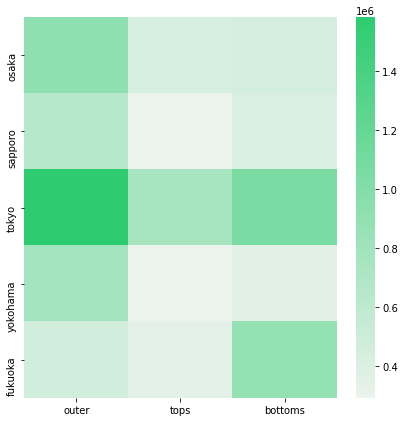

In [ ]:
plt.figure(figsize=(7,7))
cmap = sns.light_palette('#2ecc71', as_cmap=True)
sns.heatmap(df_sales_pivot, cmap=cmap)

([<matplotlib.patches.Wedge at 0x7f971ec56c50>,
 [Text(0.8706461467870358, 0.6722910731854822, 'osaka'),
  Text(-0.2183652256195214, 1.0781078926712928, 'sapporo'),
  Text(-1.0740249963032433, -0.23763481924124283, 'tokyo'),
  Text(0.37004560511146123, -1.0358891109272712, 'yokohama'),
  Text(1.0398050833339842, -0.35889467629487937, 'fukuoka')])

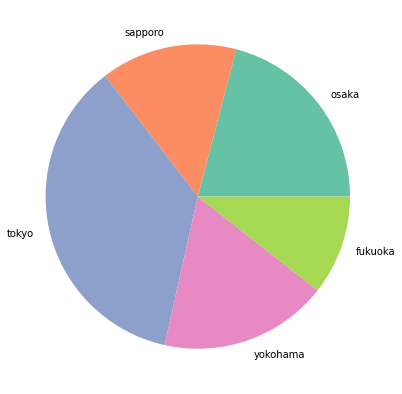

In [ ]:
plt.figure(figsize=(7,7))
sns.set_palette('Set2')

plt.pie(df_sales_pivot['outer'],labels=df_sales_pivot.index)

In [ ]:
# グラフをファイルに書く
plt.savefig('/content/drive/My Drive/graph.png', dpi=200)

In [ ]:
# pandas で　エクセルの体裁を整える 売上予測

In [1]:
import pandas as pd
import datetime

In [2]:
today  = datetime.date( 2020, 9, 14)

In [3]:
today

datetime.date(2020, 9, 14)

In [4]:
type(today)

datetime.date

In [5]:
today.year

2020

In [6]:
today.month

9

In [7]:
datetime.date(today.year, today.month, 1)

datetime.date(2020, 9, 1)

In [8]:
month_start = datetime.date(today.year, today.month, 1)

In [9]:
datetime.date(today.year, today.month+1, 1)

datetime.date(2020, 10, 1)

In [10]:
# 日付の引き算ができる関数をライブラリより引用
from datetime import timedelta

In [11]:
datetime.date(today.year, today.month+1, 1)-timedelta(days=1)

datetime.date(2020, 9, 30)

In [12]:
month_end = datetime.date(today.year, today.month+1, 1)-timedelta(days=1)

In [13]:
month_end

datetime.date(2020, 9, 30)

In [ ]:
# 本日日付取得
# today  = datetime.date.today()

In [14]:
import_file= '/content/drive/My Drive/sample_a3.xlsx'

In [15]:
excel_sheetname01 = '201909'
excel_sheetname02 = '202009'

In [16]:
df_201909 = pd.read_excel(import_file, sheet_name=excel_sheetname01, index_col = 'date' )
df_201909.head()

,sales,cost
date,,
2019-08-30,370193.0,10000
2019-08-31,604558.0,11000
2019-09-01,451000.0,3500
2019-09-02,313000.0,8000
2019-09-03,298000.0,9000


In [17]:
# 2019年のデータと2020年のデータを結合して、前年比を出す
# pandasの日付をずらすライブラリをインポートする
import pandas.tseries.offsets as offsets

In [18]:
df_201909.index + offsets.Day(364)

DatetimeIndex(['2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',
               '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12',
               '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28'],
              dtype='datetime64[ns]', name='date', freq=None)

In [19]:
df_201909['next_year']=df_201909.index + offsets.Day(364)

In [20]:
df_201909.head()

,sales,cost,next_year
date,,,
2019-08-30,370193.0,10000,2020-08-28
2019-08-31,604558.0,11000,2020-08-29
2019-09-01,451000.0,3500,2020-08-30
2019-09-02,313000.0,8000,2020-08-31
2019-09-03,298000.0,9000,2020-09-01


In [21]:
# 列ごとデータを消去する
df_201909 = df_201909.drop(['cost'], axis=1)

In [22]:
df_201909

,sales,next_year
date,,
2019-08-30,370193.0,2020-08-28
2019-08-31,604558.0,2020-08-29
2019-09-01,451000.0,2020-08-30
2019-09-02,313000.0,2020-08-31
2019-09-03,298000.0,2020-09-01
2019-09-04,310000.0,2020-09-02
2019-09-05,290000.0,2020-09-03
2019-09-06,369000.0,2020-09-04
2019-09-07,602000.0,2020-09-05


In [23]:
# インデックスを指定して2020年のデータの読み込み
df_202009 = pd.read_excel(import_file, sheet_name= excel_sheetname02, index_col = 'date')
df_202009

,sales,cost
date,,
2020-08-25,254364.0,1000.0
2020-08-26,286343.0,1000.0
2020-08-27,265857.0,1000.0
2020-08-28,302279.0,1000.0
2020-08-29,558500.0,1000.0
2020-08-30,588152.0,1000.0
2020-08-31,281777.0,1000.0
2020-09-01,249000.0,1000.0
2020-09-02,286000.0,1000.0


In [24]:
# データをmergeする
df_this_year = pd.merge(df_201909, df_202009, left_on = 'next_year', right_index = True,  how='right')
df_this_year.head(15)

,sales_x,next_year,sales_y,cost
NaT,NaN,2020-08-25,254364.0,1000.0
NaT,NaN,2020-08-26,286343.0,1000.0
NaT,NaN,2020-08-27,265857.0,1000.0
2019-08-30,370193.0,2020-08-28,302279.0,1000.0
2019-08-31,604558.0,2020-08-29,558500.0,1000.0
2019-09-01,451000.0,2020-08-30,588152.0,1000.0
2019-09-02,313000.0,2020-08-31,281777.0,1000.0
2019-09-03,298000.0,2020-09-01,249000.0,1000.0
2019-09-04,310000.0,2020-09-02,286000.0,1000.0
2019-09-05,290000.0,2020-09-03,265000.0,1000.0


In [ ]:
#df_this_year=df_this_year[3:]
#df_this_year

,sales_x,next_year,sales_y,cost
2019-08-30,370193.0,2020-08-28,302279.0,1000.0
2019-08-31,604558.0,2020-08-29,558500.0,1000.0
2019-09-01,451000.0,2020-08-30,588152.0,1000.0
2019-09-02,313000.0,2020-08-31,281777.0,1000.0
2019-09-03,298000.0,2020-09-01,249000.0,1000.0
2019-09-04,310000.0,2020-09-02,286000.0,1000.0
2019-09-05,290000.0,2020-09-03,265000.0,1000.0
2019-09-06,369000.0,2020-09-04,301000.0,1000.0
2019-09-07,602000.0,2020-09-05,502000.0,1000.0
2019-09-08,655000.0,2020-09-06,568000.0,1000.0


In [25]:
# カラム名をリネームする
df_this_year = df_this_year.rename(columns={'sales_x':'last year sales','sales_y':'this year sales', 'next_year':'date'})
df_this_year

,last year sales,date,this year sales,cost
NaT,NaN,2020-08-25,254364.0,1000.0
NaT,NaN,2020-08-26,286343.0,1000.0
NaT,NaN,2020-08-27,265857.0,1000.0
2019-08-30,370193.0,2020-08-28,302279.0,1000.0
2019-08-31,604558.0,2020-08-29,558500.0,1000.0
2019-09-01,451000.0,2020-08-30,588152.0,1000.0
2019-09-02,313000.0,2020-08-31,281777.0,1000.0
2019-09-03,298000.0,2020-09-01,249000.0,1000.0
2019-09-04,310000.0,2020-09-02,286000.0,1000.0
2019-09-05,290000.0,2020-09-03,265000.0,1000.0


In [29]:
df_this_year['last year per'] = df_this_year['this year sales']/df_this_year['last year sales']
df_this_year

,last year sales,this year sales,cost,last year per
date,,,,
2020-08-25,NaN,254364.0,1000.0,NaN
2020-08-26,NaN,286343.0,1000.0,NaN
2020-08-27,NaN,265857.0,1000.0,NaN
2020-08-28,370193.0,302279.0,1000.0,0.816544
2020-08-29,604558.0,558500.0,1000.0,0.923815
2020-08-30,451000.0,588152.0,1000.0,1.304106
2020-08-31,313000.0,281777.0,1000.0,0.900246
2020-09-01,298000.0,249000.0,1000.0,0.835570
2020-09-02,310000.0,286000.0,1000.0,0.922581


In [31]:
#df_this_year = df_this_year.set_index('date')
df_this_year = df_this_year[3:]
df_this_year.head()

,last year sales,this year sales,cost,last year per
date,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544
2020-08-29,604558.0,558500.0,1000.0,0.923815
2020-08-30,451000.0,588152.0,1000.0,1.304106
2020-08-31,313000.0,281777.0,1000.0,0.900246
2020-09-01,298000.0,249000.0,1000.0,0.835570


In [32]:
df_this_year =df_this_year.sort_index()
df_this_year

,last year sales,this year sales,cost,last year per
date,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544
2020-08-29,604558.0,558500.0,1000.0,0.923815
2020-08-30,451000.0,588152.0,1000.0,1.304106
2020-08-31,313000.0,281777.0,1000.0,0.900246
2020-09-01,298000.0,249000.0,1000.0,0.835570
2020-09-02,310000.0,286000.0,1000.0,0.922581
2020-09-03,290000.0,265000.0,1000.0,0.913793
2020-09-04,369000.0,301000.0,1000.0,0.815718
2020-09-05,602000.0,502000.0,1000.0,0.833887


In [33]:
df_this_year ['this year sales']

date
2020-08-28    302279.0
2020-08-29    558500.0
2020-08-30    588152.0
2020-08-31    281777.0
2020-09-01    249000.0
2020-09-02    286000.0
2020-09-03    265000.0
2020-09-04    301000.0
2020-09-05    502000.0
2020-09-06    568000.0
2020-09-07    268000.0
2020-09-08    248000.0
2020-09-09    279000.0
2020-09-10    250000.0
2020-09-11    321000.0
2020-09-12    511000.0
2020-09-13    583000.0
2020-09-14         NaN
2020-09-15         NaN
2020-09-16         NaN
2020-09-17         NaN
2020-09-18         NaN
2020-09-19         NaN
2020-09-20         NaN
2020-09-21         NaN
2020-09-22         NaN
2020-09-23         NaN
2020-09-24         NaN
2020-09-25         NaN
2020-09-26         NaN
2020-09-27         NaN
2020-09-28         NaN
2020-09-29         NaN
2020-09-30         NaN
Name: this year sales, dtype: float64

In [34]:
# 7行ずらす
df_this_year['this year sales'].shift(7)

date
2020-08-28         NaN
2020-08-29         NaN
2020-08-30         NaN
2020-08-31         NaN
2020-09-01         NaN
2020-09-02         NaN
2020-09-03         NaN
2020-09-04    302279.0
2020-09-05    558500.0
2020-09-06    588152.0
2020-09-07    281777.0
2020-09-08    249000.0
2020-09-09    286000.0
2020-09-10    265000.0
2020-09-11    301000.0
2020-09-12    502000.0
2020-09-13    568000.0
2020-09-14    268000.0
2020-09-15    248000.0
2020-09-16    279000.0
2020-09-17    250000.0
2020-09-18    321000.0
2020-09-19    511000.0
2020-09-20    583000.0
2020-09-21         NaN
2020-09-22         NaN
2020-09-23         NaN
2020-09-24         NaN
2020-09-25         NaN
2020-09-26         NaN
2020-09-27         NaN
2020-09-28         NaN
2020-09-29         NaN
2020-09-30         NaN
Name: this year sales, dtype: float64

In [35]:
df_this_year['last week sales']=df_this_year['this year sales'].shift(7)
df_this_year

,last year sales,this year sales,cost,last year per,last week sales
date,,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544,NaN
2020-08-29,604558.0,558500.0,1000.0,0.923815,NaN
2020-08-30,451000.0,588152.0,1000.0,1.304106,NaN
2020-08-31,313000.0,281777.0,1000.0,0.900246,NaN
2020-09-01,298000.0,249000.0,1000.0,0.835570,NaN
2020-09-02,310000.0,286000.0,1000.0,0.922581,NaN
2020-09-03,290000.0,265000.0,1000.0,0.913793,NaN
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0


In [36]:
df_this_year['last week per']=df_this_year['this year sales']/df_this_year['last week sales']
df_this_year

,last year sales,this year sales,cost,last year per,last week sales,last week per
date,,,,,,
2020-08-28,370193.0,302279.0,1000.0,0.816544,NaN,NaN
2020-08-29,604558.0,558500.0,1000.0,0.923815,NaN,NaN
2020-08-30,451000.0,588152.0,1000.0,1.304106,NaN,NaN
2020-08-31,313000.0,281777.0,1000.0,0.900246,NaN,NaN
2020-09-01,298000.0,249000.0,1000.0,0.835570,NaN,NaN
2020-09-02,310000.0,286000.0,1000.0,0.922581,NaN,NaN
2020-09-03,290000.0,265000.0,1000.0,0.913793,NaN,NaN
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0,0.995769
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0,0.898836


In [37]:
#pythonとpandasでは日付型が異なる
today = datetime.date(2020, 9, 14)
df_this_year.index >= today

TypeError: ignored

In [38]:
today

datetime.date(2020, 9, 14)

In [ ]:
# to_datetime 関数を使う
df_this_year.index >= pd.to_datetime(today)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [39]:
(df_this_year.index >= pd.to_datetime(month_start)) & (df_this_year.index < pd.to_datetime(today))

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [41]:
df_this_year = df_this_year[(df_this_year.index >= pd.to_datetime(month_start)) & (df_this_year.index < pd.to_datetime(today)) & ~(df_this_year['last week sales'].isna())]
df_this_year

,last year sales,this year sales,cost,last year per,last week sales,last week per
date,,,,,,
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0,0.995769
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0,0.898836
2020-09-06,655000.0,568000.0,1000.0,0.867176,588152.0,0.965737
2020-09-07,287000.0,268000.0,1000.0,0.933798,281777.0,0.951107
2020-09-08,268000.0,248000.0,1500.0,0.925373,249000.0,0.995984
2020-09-09,243000.0,279000.0,1500.0,1.148148,286000.0,0.975524
2020-09-10,251000.0,250000.0,1500.0,0.996016,265000.0,0.943396
2020-09-11,276000.0,321000.0,1500.0,1.163043,301000.0,1.066445
2020-09-12,420700.0,511000.0,1500.0,1.214642,502000.0,1.017928


In [43]:
import matplotlib.pyplot as plt
# ここでグラフを表示させる
%matplotlib inline

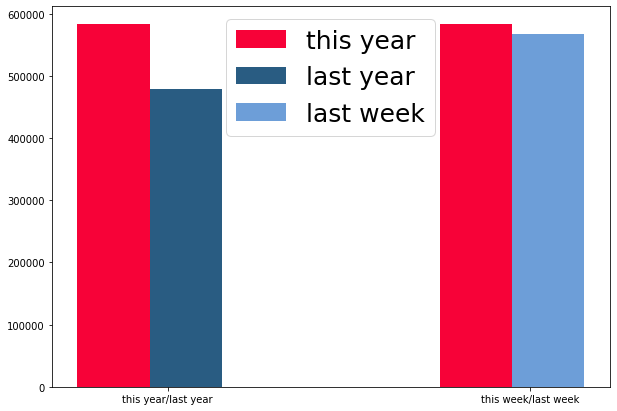

In [50]:
plt.figure(figsize=(10,7))

x1=[1,2]
y1 = [df_this_year.loc['2020-09-13', 'this year sales'], df_this_year.loc['2020-09-13','this year sales']]
      
x2 = [1.2]
y2 = [df_this_year.loc['2020-09-13','last year sales']]

x3 =[2.2]
y3 = [df_this_year.loc['2020-09-13', 'last week sales']]

plt.bar(x1, y1, color='#F70238', label='this year', width=0.2, align="center")
plt.bar(x2, y2, color='#295C82', label='last year', width=0.2, align="center")
plt.bar(x3, y3, color='#6D9ED8', label='last week', width=0.2, align="center")

label_x =['this year/last year', 'this week/last week']
plt.xticks([1.15, 2.15], label_x)
plt.legend(fontsize=25,loc='upper center')

plt.savefig("/content/drive/My Drive/graph01.png", dpi=60)

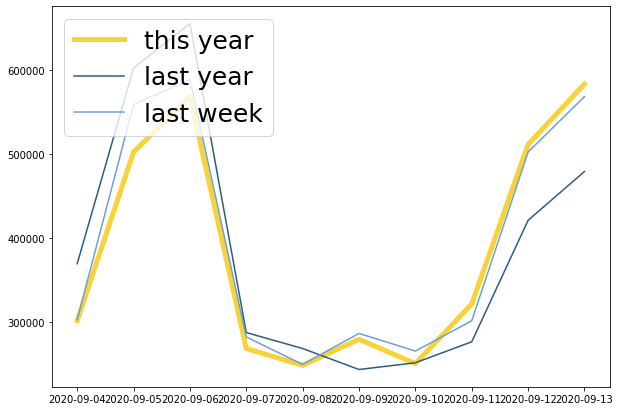

In [53]:
plt.figure(figsize=(10,7))   #グラフのサイズ指定

x = df_this_year.index  # x軸の値を指定
y1 = df_this_year['this year sales']   # y軸の値を指定する 、折れ線グラフ
y2 = df_this_year['last year sales']
y3 = df_this_year['last week sales']

# 実際のプロット
plt.plot(x, y1, color="#f7d238", label='this year',  linewidth="5")
plt.plot(x, y2, color="#295c82", label='last year')
plt.plot(x, y3, color="#6d9ed8", label='last week')

plt.legend(fontsize=25, loc='upper left')  # 凡例の位置とフォントサイズを指定
plt.savefig("/content/drive/My Drive/graph02.png")

In [54]:
# 重回帰分析　予測に使うデータが2つ以上
# 単回帰分析

In [56]:
df_201909 = pd.read_excel(import_file, sheet_name=excel_sheetname01, index_col='date')
df_201909 = df_201909[['sales','cost']]

In [57]:
df_202009 = pd.read_excel(import_file, sheet_name = excel_sheetname02, index_col='date')
df_202009 = df_202009[['sales','cost']]

In [58]:
# 2つのデータフレームを縦に結合
pd.concat([df_201909,df_202009])

,sales,cost
date,,
2019-08-30,370193.0,10000.0
2019-08-31,604558.0,11000.0
2019-09-01,451000.0,3500.0
2019-09-02,313000.0,8000.0
2019-09-03,298000.0,9000.0
...,...,...
2020-09-26,NaN,NaN
2020-09-27,NaN,NaN
2020-09-28,NaN,NaN


In [59]:
df_concat = pd.concat([df_201909,  df_202009])

In [60]:
df_concat

,sales,cost
date,,
2019-08-30,370193.0,10000.0
2019-08-31,604558.0,11000.0
2019-09-01,451000.0,3500.0
2019-09-02,313000.0,8000.0
2019-09-03,298000.0,9000.0
...,...,...
2020-09-26,NaN,NaN
2020-09-27,NaN,NaN
2020-09-28,NaN,NaN


In [68]:
df_concat['weekday_name'] = df_concat.index.day_name()

In [69]:
df_concat

,sales,cost,weekday_name
date,,,
2019-08-30,370193.0,10000.0,Friday
2019-08-31,604558.0,11000.0,Saturday
2019-09-01,451000.0,3500.0,Sunday
2019-09-02,313000.0,8000.0,Monday
2019-09-03,298000.0,9000.0,Tuesday
...,...,...,...
2020-09-26,NaN,NaN,Saturday
2020-09-27,NaN,NaN,Sunday
2020-09-28,NaN,NaN,Monday


In [70]:
# 空行削除
df_concat = df_concat.dropna()
df_concat

,sales,cost,weekday_name
date,,,
2019-08-30,370193.0,10000.0,Friday
2019-08-31,604558.0,11000.0,Saturday
2019-09-01,451000.0,3500.0,Sunday
2019-09-02,313000.0,8000.0,Monday
2019-09-03,298000.0,9000.0,Tuesday
2019-09-04,310000.0,11000.0,Wednesday
2019-09-05,290000.0,8000.0,Thursday
2019-09-06,369000.0,11000.0,Friday
2019-09-07,602000.0,12000.0,Saturday


In [77]:
df_201909_weekdayname = df_concat[['weekday_name','sales']].groupby('weekday_name').mean()
df_201909_weekdayname

,sales
weekday_name,
Friday,325759.000000
Monday,310111.000000
Saturday,539694.750000
Sunday,569869.000000
Thursday,258122.428571
Tuesday,260909.142857
Wednesday,265906.142857


<BarContainer object of 7 artists>

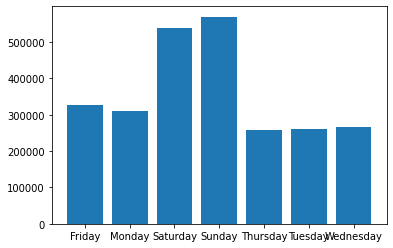

In [79]:
plt.bar(df_201909_weekdayname.index, df_201909_weekdayname['sales'])

In [72]:
# matplotlib 由来で　matplotlib より美しいグラフが描ける
import seaborn as sns

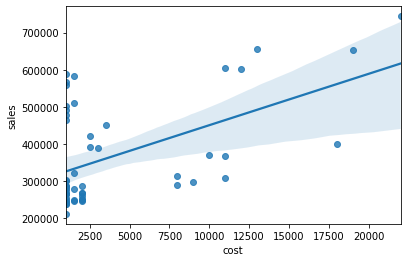

In [73]:
# 回帰直線と散布図を描く
sns.regplot(x=df_concat['cost'], y=df_concat['sales'], data=df_concat)

In [74]:
df_concat.tail(10)

,sales,cost,weekday_name
date,,,
2020-09-04,301000.0,1000.0,Friday
2020-09-05,502000.0,1000.0,Saturday
2020-09-06,568000.0,1000.0,Sunday
2020-09-07,268000.0,1000.0,Monday
2020-09-08,248000.0,1500.0,Tuesday
2020-09-09,279000.0,1500.0,Wednesday
2020-09-10,250000.0,1500.0,Thursday
2020-09-11,321000.0,1500.0,Friday
2020-09-12,511000.0,1500.0,Saturday


In [80]:
# コストをかけると売上が上がる、曜日（週末）のほうが売り上げが高い
# 以上の２点で重回帰分析をする

In [82]:
# 週末と平日に分ける
def find_weekend(weekday_name):
    if (weekday_name == "Saturday") or (weekday_name == "Sunday"):
        return "weekend"
    else:
        return "weekday"

In [84]:
df_concat["weekday_name"].apply(find_weekend)

date
2019-08-30    weekday
2019-08-31    weekend
2019-09-01    weekend
2019-09-02    weekday
2019-09-03    weekday
2019-09-04    weekday
2019-09-05    weekday
2019-09-06    weekday
2019-09-07    weekend
2019-09-08    weekend
2019-09-09    weekday
2019-09-10    weekday
2019-09-11    weekday
2019-09-12    weekday
2019-09-13    weekday
2019-09-14    weekend
2019-09-15    weekend
2019-09-16    weekday
2019-09-17    weekday
2019-09-18    weekday
2019-09-19    weekday
2019-09-20    weekday
2019-09-21    weekend
2019-09-22    weekend
2019-09-23    weekday
2019-09-24    weekday
2019-09-25    weekday
2019-09-26    weekday
2019-09-27    weekday
2019-09-28    weekend
2019-09-29    weekend
2019-09-30    weekday
2020-08-25    weekday
2020-08-26    weekday
2020-08-27    weekday
2020-08-28    weekday
2020-08-29    weekend
2020-08-30    weekend
2020-08-31    weekday
2020-09-01    weekday
2020-09-02    weekday
2020-09-03    weekday
2020-09-04    weekday
2020-09-05    weekend
2020-09-06    weekend
2020-

In [85]:
df_concat["weekend"]=df_concat["weekday_name"].apply(find_weekend)
df_concat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sales,cost,weekday_name,weekend
date,,,,
2019-08-30,370193.0,10000.0,Friday,weekday
2019-08-31,604558.0,11000.0,Saturday,weekend
2019-09-01,451000.0,3500.0,Sunday,weekend
2019-09-02,313000.0,8000.0,Monday,weekday
2019-09-03,298000.0,9000.0,Tuesday,weekday
2019-09-04,310000.0,11000.0,Wednesday,weekday
2019-09-05,290000.0,8000.0,Thursday,weekday
2019-09-06,369000.0,11000.0,Friday,weekday
2019-09-07,602000.0,12000.0,Saturday,weekend


In [87]:
df_concat = df_concat.drop(columns="weekday_name", axis=1)
df_concat.head()

,sales,cost,weekend
date,,,
2019-08-30,370193.0,10000.0,weekday
2019-08-31,604558.0,11000.0,weekend
2019-09-01,451000.0,3500.0,weekend
2019-09-02,313000.0,8000.0,weekday
2019-09-03,298000.0,9000.0,weekday


In [88]:
import sklearn
from sklearn.linear_model import LinearRegression

In [89]:
# 重回帰分析は数字しか扱えない → ダミー変数により文字を０か１で扱えるようにする
df_201909_dummies = pd.get_dummies(df_concat)
df_201909_dummies

,sales,cost,weekend_weekday,weekend_weekend
date,,,,
2019-08-30,370193.0,10000.0,1,0
2019-08-31,604558.0,11000.0,0,1
2019-09-01,451000.0,3500.0,0,1
2019-09-02,313000.0,8000.0,1,0
2019-09-03,298000.0,9000.0,1,0
2019-09-04,310000.0,11000.0,1,0
2019-09-05,290000.0,8000.0,1,0
2019-09-06,369000.0,11000.0,1,0
2019-09-07,602000.0,12000.0,0,1


In [91]:
# 'sales' をドロップしたデータを x にする
x = df_201909_dummies.drop('sales', axis=1)

In [92]:
# 'sales' を y にする
y = df_201909_dummies['sales']

In [93]:
# 説明変数：予測に使うデータ　目的変数：予測したいデータ（売上）
# 線形回帰モデルをインスタンス化
model = LinearRegression()

In [94]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# 重回帰の切片
model.intercept_

380096.40087424684

In [96]:
# 重回帰の係数
model.coef_

array([ 8.83075867e+00, -1.23356689e+05,  1.23356689e+05])

In [97]:
df_201909_dummies.columns

Index(['sales', 'cost', 'weekend_weekday', 'weekend_weekend'], dtype='object')

In [98]:
features = df_201909_dummies.drop('sales', axis=1).columns
features

Index(['cost', 'weekend_weekday', 'weekend_weekend'], dtype='object')

In [100]:
df_coefficient = pd.DataFrame({'features_name':features, 'coefficient':model.coef_})
df_coefficient

,features_name,coefficient
0,cost,8.830759
1,weekend_weekday,-123356.689351
2,weekend_weekend,123356.689351


In [101]:
# このモデルの精度
# 決定係数　0～1:0.8以上であればそれなりの精度
model.score(x,y)

0.9127081209775232

In [102]:
df_this_year

,last year sales,this year sales,cost,last year per,last week sales,last week per
date,,,,,,
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0,0.995769
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0,0.898836
2020-09-06,655000.0,568000.0,1000.0,0.867176,588152.0,0.965737
2020-09-07,287000.0,268000.0,1000.0,0.933798,281777.0,0.951107
2020-09-08,268000.0,248000.0,1500.0,0.925373,249000.0,0.995984
2020-09-09,243000.0,279000.0,1500.0,1.148148,286000.0,0.975524
2020-09-10,251000.0,250000.0,1500.0,0.996016,265000.0,0.943396
2020-09-11,276000.0,321000.0,1500.0,1.163043,301000.0,1.066445
2020-09-12,420700.0,511000.0,1500.0,1.214642,502000.0,1.017928


In [103]:
# 1日ごとの日付を作る
pd.date_range(start=today, end=month_end, freq=('D'))

DatetimeIndex(['2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30'],
              dtype='datetime64[ns]', freq='D')

In [105]:
date_range = pd.date_range(start=today, end=month_end, freq='D')

In [110]:
df_prediction = pd.DataFrame(index=date_range, columns=['this year sales', 'this year sales(cost)'])
df_prediction

,this year sales,this year sales(cost)
2020-09-14,NaN,NaN
2020-09-15,NaN,NaN
2020-09-16,NaN,NaN
2020-09-17,NaN,NaN
2020-09-18,NaN,NaN
2020-09-19,NaN,NaN
2020-09-20,NaN,NaN
2020-09-21,NaN,NaN
2020-09-22,NaN,NaN
2020-09-23,NaN,NaN


In [126]:
df_prediction['weekday_name']=df_prediction.index.day_name()

In [127]:
df_prediction["weekend"] = df_prediction["weekday_name"].apply(find_weekend)

In [128]:
df_prediction

,this year sales,this year sales(cost),weekday_name,weekend
2020-09-14,266740,256740,Monday,weekday
2020-09-15,266740,256740,Tuesday,weekday
2020-09-16,266740,256740,Wednesday,weekday
2020-09-17,266740,256740,Thursday,weekday
2020-09-18,266740,256740,Friday,weekday
2020-09-19,503462,503453,Saturday,weekend
2020-09-20,503462,503453,Sunday,weekend
2020-09-21,266740,256740,Monday,weekday
2020-09-22,266740,256740,Tuesday,weekday
2020-09-23,266740,256740,Wednesday,weekday


In [114]:
df_prediction.index

DatetimeIndex(['2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17',
               '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29',
               '2020-09-30'],
              dtype='datetime64[ns]', freq='D')

In [116]:
# 切片を代入
y = model.intercept_
# 係数を代入 広告費・平日・休日
x_cost = model.coef_[0]
x_weekday = model.coef_[1]
x_weekend = model.coef_[2]

In [117]:
# 予測データフレームのインデックスを順に表示
for index_name in df_prediction.index:
  print(index_name)

2020-09-14 00:00:00
2020-09-15 00:00:00
2020-09-16 00:00:00
2020-09-17 00:00:00
2020-09-18 00:00:00
2020-09-19 00:00:00
2020-09-20 00:00:00
2020-09-21 00:00:00
2020-09-22 00:00:00
2020-09-23 00:00:00
2020-09-24 00:00:00
2020-09-25 00:00:00
2020-09-26 00:00:00
2020-09-27 00:00:00
2020-09-28 00:00:00
2020-09-29 00:00:00
2020-09-30 00:00:00


In [118]:
for index_name in df_prediction.index:
    print(df_prediction.loc[index_name, 'weekend'])

weekday
weekday
weekday
weekday
weekday
weekend
weekend
weekday
weekday
weekday
weekday
weekday
weekend
weekend
weekday
weekday
weekday


In [119]:
df_prediction

,this year sales,this year sales(cost),weekday_name,weekend
2020-09-14,NaN,NaN,Monday,weekday
2020-09-15,NaN,NaN,Tuesday,weekday
2020-09-16,NaN,NaN,Wednesday,weekday
2020-09-17,NaN,NaN,Thursday,weekday
2020-09-18,NaN,NaN,Friday,weekday
2020-09-19,NaN,NaN,Saturday,weekend
2020-09-20,NaN,NaN,Sunday,weekend
2020-09-21,NaN,NaN,Monday,weekday
2020-09-22,NaN,NaN,Tuesday,weekday
2020-09-23,NaN,NaN,Wednesday,weekday


In [120]:
cost=10000

In [129]:
for index_name in df_prediction.index:
    if df_prediction.loc[index_name, 'weekend'] == "weekend":
        df_prediction.loc[index_name, 'this year sales'] = y + x_weekend + x_cost*0
        df_prediction.loc[index_name, 'this year sales(cost)'] = y + x_weekend + x_cost*cost
    else:
        df_prediction.loc[index_name, 'this year sales'] = y + x_weekday + cost*0
        df_prediction.loc[index_name, 'this year sales(cost)'] = y + x_weekday + x_cost*cost

In [130]:
df_prediction = df_prediction.drop(columns=['weekday_name', 'weekend'])
df_prediction.head(7)

,this year sales,this year sales(cost)
2020-09-14,256740,345047
2020-09-15,256740,345047
2020-09-16,256740,345047
2020-09-17,256740,345047
2020-09-18,256740,345047
2020-09-19,503453,591761
2020-09-20,503453,591761


In [131]:
df_this_year['this year sales(cost)'] = df_this_year['this year sales']
df_this_year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,last year sales,this year sales,cost,last year per,last week sales,last week per,this year sales(cost)
date,,,,,,,
2020-09-04,369000.0,301000.0,1000.0,0.815718,302279.0,0.995769,301000.0
2020-09-05,602000.0,502000.0,1000.0,0.833887,558500.0,0.898836,502000.0
2020-09-06,655000.0,568000.0,1000.0,0.867176,588152.0,0.965737,568000.0
2020-09-07,287000.0,268000.0,1000.0,0.933798,281777.0,0.951107,268000.0
2020-09-08,268000.0,248000.0,1500.0,0.925373,249000.0,0.995984,248000.0
2020-09-09,243000.0,279000.0,1500.0,1.148148,286000.0,0.975524,279000.0
2020-09-10,251000.0,250000.0,1500.0,0.996016,265000.0,0.943396,250000.0
2020-09-11,276000.0,321000.0,1500.0,1.163043,301000.0,1.066445,321000.0
2020-09-12,420700.0,511000.0,1500.0,1.214642,502000.0,1.017928,511000.0


In [133]:
df_this_year = pd.concat([df_this_year, df_prediction], sort=False)
df_this_year

,last year sales,this year sales,cost,last year per,last week sales,last week per,this year sales(cost)
2020-09-04,369000.0,301000,1000.0,0.815718,302279.0,0.995769,301000
2020-09-05,602000.0,502000,1000.0,0.833887,558500.0,0.898836,502000
2020-09-06,655000.0,568000,1000.0,0.867176,588152.0,0.965737,568000
2020-09-07,287000.0,268000,1000.0,0.933798,281777.0,0.951107,268000
2020-09-08,268000.0,248000,1500.0,0.925373,249000.0,0.995984,248000
2020-09-09,243000.0,279000,1500.0,1.148148,286000.0,0.975524,279000
2020-09-10,251000.0,250000,1500.0,0.996016,265000.0,0.943396,250000
2020-09-11,276000.0,321000,1500.0,1.163043,301000.0,1.066445,321000
2020-09-12,420700.0,511000,1500.0,1.214642,502000.0,1.017928,511000
2020-09-13,478800.0,583000,1500.0,1.217627,568000.0,1.026408,583000


In [134]:
# データフレームにカラム名を渡すと並べ替えできる
df_this_year = df_this_year[['this year sales','this year sales(cost)','cost','last week per','last week sales','last year sales']]
df_this_year

,this year sales,this year sales(cost),cost,last week per,last week sales,last year sales
2020-09-04,301000,301000,1000.0,0.995769,302279.0,369000.0
2020-09-05,502000,502000,1000.0,0.898836,558500.0,602000.0
2020-09-06,568000,568000,1000.0,0.965737,588152.0,655000.0
2020-09-07,268000,268000,1000.0,0.951107,281777.0,287000.0
2020-09-08,248000,248000,1500.0,0.995984,249000.0,268000.0
2020-09-09,279000,279000,1500.0,0.975524,286000.0,243000.0
2020-09-10,250000,250000,1500.0,0.943396,265000.0,251000.0
2020-09-11,321000,321000,1500.0,1.066445,301000.0,276000.0
2020-09-12,511000,511000,1500.0,1.017928,502000.0,420700.0
2020-09-13,583000,583000,1500.0,1.026408,568000.0,478800.0


In [135]:
prediction = int(df_this_year['this year sales'].sum())
prediction

9182428

In [137]:
prediction_cost = int(df_this_year['this year sales(cost)'].sum())
prediction_cost

10683657

In [138]:
!pip install openpyxl

In [139]:
import openpyxl
from openpyxl.styles import Font               #フォントの関数
from openpyxl.styles.alignment import Alignment #セルの位置
from openpyxl.styles import colors　# 色を付ける
from openpyxl.styles import PatternFill #パターンを塗りつぶす
from openpyxl.drawing.image import Image  # イメージを書き込む

In [144]:
export_file = '/content/drive/My Drive/excel03_after.xlsx'

In [141]:
df_this_year.head()

,this year sales,this year sales(cost),cost,last week per,last week sales,last year sales
2020-09-04,301000,301000,1000.0,0.995769,302279.0,369000.0
2020-09-05,502000,502000,1000.0,0.898836,558500.0,602000.0
2020-09-06,568000,568000,1000.0,0.965737,588152.0,655000.0
2020-09-07,268000,268000,1000.0,0.951107,281777.0,287000.0
2020-09-08,248000,248000,1500.0,0.995984,249000.0,268000.0


In [145]:
df_this_year.to_excel(export_file)

In [147]:
workbook = openpyxl.load_workbook(export_file)
worksheet = workbook.worksheets[0]

In [148]:
font = Font(name='メイリオ', size=14)
# レンジのデータがタプル型で生成される 行ごと
sheet_range = worksheet['A1':'H31']
sheet_range

((<Cell 'Sheet1'.A1>,
  <Cell 'Sheet1'.B1>,
  <Cell 'Sheet1'.C1>,
  <Cell 'Sheet1'.D1>,
  <Cell 'Sheet1'.E1>,
  <Cell 'Sheet1'.F1>,
  <Cell 'Sheet1'.G1>,
  <Cell 'Sheet1'.H1>),
 (<Cell 'Sheet1'.A2>,
  <Cell 'Sheet1'.B2>,
  <Cell 'Sheet1'.C2>,
  <Cell 'Sheet1'.D2>,
  <Cell 'Sheet1'.E2>,
  <Cell 'Sheet1'.F2>,
  <Cell 'Sheet1'.G2>,
  <Cell 'Sheet1'.H2>),
 (<Cell 'Sheet1'.A3>,
  <Cell 'Sheet1'.B3>,
  <Cell 'Sheet1'.C3>,
  <Cell 'Sheet1'.D3>,
  <Cell 'Sheet1'.E3>,
  <Cell 'Sheet1'.F3>,
  <Cell 'Sheet1'.G3>,
  <Cell 'Sheet1'.H3>),
 (<Cell 'Sheet1'.A4>,
  <Cell 'Sheet1'.B4>,
  <Cell 'Sheet1'.C4>,
  <Cell 'Sheet1'.D4>,
  <Cell 'Sheet1'.E4>,
  <Cell 'Sheet1'.F4>,
  <Cell 'Sheet1'.G4>,
  <Cell 'Sheet1'.H4>),
 (<Cell 'Sheet1'.A5>,
  <Cell 'Sheet1'.B5>,
  <Cell 'Sheet1'.C5>,
  <Cell 'Sheet1'.D5>,
  <Cell 'Sheet1'.E5>,
  <Cell 'Sheet1'.F5>,
  <Cell 'Sheet1'.G5>,
  <Cell 'Sheet1'.H5>),
 (<Cell 'Sheet1'.A6>,
  <Cell 'Sheet1'.B6>,
  <Cell 'Sheet1'.C6>,
  <Cell 'Sheet1'.D6>,
  <Cell 'Sheet1'.E6>,
  <Ce

In [154]:
for row in sheet_range:
     for cell in row:
       print(cell)

<Cell 'Sheet1'.A1>
<Cell 'Sheet1'.B1>
<Cell 'Sheet1'.C1>
<Cell 'Sheet1'.D1>
<Cell 'Sheet1'.E1>
<Cell 'Sheet1'.F1>
<Cell 'Sheet1'.G1>
<Cell 'Sheet1'.H1>
<Cell 'Sheet1'.A2>
<Cell 'Sheet1'.B2>
<Cell 'Sheet1'.C2>
<Cell 'Sheet1'.D2>
<Cell 'Sheet1'.E2>
<Cell 'Sheet1'.F2>
<Cell 'Sheet1'.G2>
<Cell 'Sheet1'.H2>
<Cell 'Sheet1'.A3>
<Cell 'Sheet1'.B3>
<Cell 'Sheet1'.C3>
<Cell 'Sheet1'.D3>
<Cell 'Sheet1'.E3>
<Cell 'Sheet1'.F3>
<Cell 'Sheet1'.G3>
<Cell 'Sheet1'.H3>
<Cell 'Sheet1'.A4>
<Cell 'Sheet1'.B4>
<Cell 'Sheet1'.C4>
<Cell 'Sheet1'.D4>
<Cell 'Sheet1'.E4>
<Cell 'Sheet1'.F4>
<Cell 'Sheet1'.G4>
<Cell 'Sheet1'.H4>
<Cell 'Sheet1'.A5>
<Cell 'Sheet1'.B5>
<Cell 'Sheet1'.C5>
<Cell 'Sheet1'.D5>
<Cell 'Sheet1'.E5>
<Cell 'Sheet1'.F5>
<Cell 'Sheet1'.G5>
<Cell 'Sheet1'.H5>
<Cell 'Sheet1'.A6>
<Cell 'Sheet1'.B6>
<Cell 'Sheet1'.C6>
<Cell 'Sheet1'.D6>
<Cell 'Sheet1'.E6>
<Cell 'Sheet1'.F6>
<Cell 'Sheet1'.G6>
<Cell 'Sheet1'.H6>
<Cell 'Sheet1'.A7>
<Cell 'Sheet1'.B7>
<Cell 'Sheet1'.C7>
<Cell 'Sheet1'.D7>
<Cell 'Sheet

In [156]:
for row in sheet_range:
    for cell in row:
        print(cell)
        worksheet[cell.coordinate].font = font

<Cell 'Sheet1'.A1>
<Cell 'Sheet1'.B1>
<Cell 'Sheet1'.C1>
<Cell 'Sheet1'.D1>
<Cell 'Sheet1'.E1>
<Cell 'Sheet1'.F1>
<Cell 'Sheet1'.G1>
<Cell 'Sheet1'.H1>
<Cell 'Sheet1'.A2>
<Cell 'Sheet1'.B2>
<Cell 'Sheet1'.C2>
<Cell 'Sheet1'.D2>
<Cell 'Sheet1'.E2>
<Cell 'Sheet1'.F2>
<Cell 'Sheet1'.G2>
<Cell 'Sheet1'.H2>
<Cell 'Sheet1'.A3>
<Cell 'Sheet1'.B3>
<Cell 'Sheet1'.C3>
<Cell 'Sheet1'.D3>
<Cell 'Sheet1'.E3>
<Cell 'Sheet1'.F3>
<Cell 'Sheet1'.G3>
<Cell 'Sheet1'.H3>
<Cell 'Sheet1'.A4>
<Cell 'Sheet1'.B4>
<Cell 'Sheet1'.C4>
<Cell 'Sheet1'.D4>
<Cell 'Sheet1'.E4>
<Cell 'Sheet1'.F4>
<Cell 'Sheet1'.G4>
<Cell 'Sheet1'.H4>
<Cell 'Sheet1'.A5>
<Cell 'Sheet1'.B5>
<Cell 'Sheet1'.C5>
<Cell 'Sheet1'.D5>
<Cell 'Sheet1'.E5>
<Cell 'Sheet1'.F5>
<Cell 'Sheet1'.G5>
<Cell 'Sheet1'.H5>
<Cell 'Sheet1'.A6>
<Cell 'Sheet1'.B6>
<Cell 'Sheet1'.C6>
<Cell 'Sheet1'.D6>
<Cell 'Sheet1'.E6>
<Cell 'Sheet1'.F6>
<Cell 'Sheet1'.G6>
<Cell 'Sheet1'.H6>
<Cell 'Sheet1'.A7>
<Cell 'Sheet1'.B7>
<Cell 'Sheet1'.C7>
<Cell 'Sheet1'.D7>
<Cell 'Sheet

In [157]:
workbook.save(export_file)

In [158]:
fill = openpyxl.styles.PatternFill(patternType='solid', fgColor='295c82', bgColor='295c82')
for col in ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1"]:
    worksheet[col].fill = fill

In [160]:
workbook.save(export_file)

In [162]:
for col in ['A','B','D','E','F','G', 'H', 'K']:
    worksheet.column_dimensions[col].width =18

worksheet.column_dimensions['C'].width=24
worksheet.column_dimensions['J'].width=30

In [163]:
workbook.save(export_file)

In [164]:
for col in ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1"]:
    worksheet[col].font = Font(color="FFFFFF")

In [165]:
for col in ["A1", "B1", "C1", "D1", "E1", "F1", "G1", "H1"]:
    worksheet[col].font = Font(name='メイリオ', size=14, color="FFFFFF")

In [166]:
workbook.save(export_file)